# <center>Instacart Market Basket Analysis - EDA</center>

## Contents:

<ol start=1>
  <li>
    Loading the data
  </li>
</ol>

<ol start=2>
  <li>
    Basic Information about the data
    <ol>
      <li>Aisle</li>
      <li>Department</li>
      <li>Order Product Prior</li>
      <li>Order Product Train</li>
      <li>Order</li>
      <li>Products</li>
      <li>Summary</li>
    </ol>
  </li>
</ol>

<ol start=3>
  <li>
    Univariate Analysis
    <ol>
      <li>Order Product Prior</li>
      <li>Order Product Train</li>
      <li>Train</li>
      <li>Product Order Prior</li>
      <li>Product Order Train</li>
      <li>Summary</li>
    </ol>
  </li>
</ol>

<ol start=4>
  <li>
    Bivariate Analysis
    <ol>
      <li>order_dow vs order_hour_of_day</li>
      <li>order_dow vs days_since_prior_order</li>
      <li>order_hour_of_day vs days_since_prior_order</li>
    </ol>
  </li>
</ol>

<ol start=5>
  <li>
    Correlation
  </li>
</ol>

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

# 1. Getting Basic Information about the data

## 1.1. aisles

### 1.1.1. Top 5 rows

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### 1.1.2. Dataframe shape

In [4]:
print("Rows = {0}, Columns = {1}".format(aisles.shape[0],aisles.shape[1]))

Rows = 134, Columns = 2


### 1.1.3. Descriptive analysis

In [5]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


### 1.1.4. Basic info

In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### 1.1.5. Unique Aisles

In [7]:
# https://www.geeksforgeeks.org/python-pandas-series-nunique/
print("Total Number of aisles = ", aisles['aisle_id'].nunique())

Total Number of aisles =  134


### 1.1.6. Missing Values

In [8]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

## 1.2. Departments

### 1.2.1. Top 5 rows

In [9]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### 1.2.2. Dataframe shape

In [10]:
print("Rows = {0}, Columns = {1}".format(departments.shape[0],departments.shape[1]))

Rows = 21, Columns = 2


### 1.2.3. Descriptive Analysis

In [11]:
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


### 1.2.4. Basic Info

In [12]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


### 1.2.5. Unique Departments

In [13]:
# https://www.geeksforgeeks.org/python-pandas-series-nunique/
print("Total Number of departments = ", departments['department_id'].nunique())

Total Number of departments =  21


### 1.2.6. Missing Values

In [14]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

## 1.3. Order Products Prior

### 1.3.1. Top 5 rows

In [15]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### 1.3.2. Dataframe shape

In [16]:
print("Rows = {0}, Columns = {1}".format(order_products_prior.shape[0],order_products_prior.shape[1]))

Rows = 32434489, Columns = 4


### 1.3.3. Analysis of add_to_cart_order variable

In [17]:
order_products_prior['add_to_cart_order'].describe()

count    3.243449e+07
mean     8.351076e+00
std      7.126671e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

<h3 style = "color:red">Observation: Maximum 145 products had been added to the cart by the coustomer.</h3>

### 1.3.4. Basic info

In [18]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


### 1.3.5. reordered products count

In [19]:
order_products_prior['reordered'].value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

### 1.3.6. reordered products percentage

In [20]:
order_products_prior['reordered'].value_counts(normalize=True)

1    0.589697
0    0.410303
Name: reordered, dtype: float64

   <h3 style="color:red">Observation: Almost 59% of the products have been reordered.</h3>

### 1.3.7. Missing Values

In [21]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## 1.4. Order Products Train

### 1.4.1. Top 5 rows

In [22]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### 1.4.2. Dataframe shape

In [23]:
print("Rows = {0}, Columns = {1}".format(order_products_train.shape[0],order_products_train.shape[1]))

Rows = 1384617, Columns = 4


### 1.4.3. Add to cart order variable analysis

In [24]:
order_products_train['add_to_cart_order'].describe()

count    1.384617e+06
mean     8.758044e+00
std      7.423936e+00
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      8.000000e+01
Name: add_to_cart_order, dtype: float64

<h3 style="color:red">Observation: Maximum 80 products had been added to the cart by any customer.</h3>

### 1.4.4. Basic Info

In [25]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### 1.4.5. Reordered products count

In [26]:
order_products_train['reordered'].value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

### 1.4.6. Reordered products percentage

In [27]:
order_products_train['reordered'].value_counts(normalize=True)

1    0.598594
0    0.401406
Name: reordered, dtype: float64

   <h3 style="color:red"> Observation: Almost 60% of the products had been reordered.</h3>

### 1.4.7. Missing Values

In [28]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## 1.5. Orders

### 1.5.1. Top 5 rows

In [29]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### 1.5.2. Dataframe shape

In [30]:
print("Rows = {0}, Columns = {1}".format(orders.shape[0],orders.shape[1]))

Rows = 3421083, Columns = 7


### 1.5.3. Descriptive Analysis

In [31]:
orders[['order_number','order_dow','order_hour_of_day','days_since_prior_order']].describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


### 1.5.4. Basic Info

In [32]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


### 1.5.5. Unique Orders

In [33]:
## https://www.geeksforgeeks.org/python-pandas-series-nunique/

print("Total Number of orders = ", orders['order_id'].nunique())

Total Number of orders =  3421083


### 1.5.6. Unique Users

In [34]:
## https://www.geeksforgeeks.org/python-pandas-series-nunique/

print("Total Number of users = ", orders['user_id'].nunique())

Total Number of users =  206209


### 1.5.7. Missing Values

In [35]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

<h3 style="color:red">There are 206209 missing values of the variable days_since_prior_order</h3>

## 1.6. Products

### 1.6.1. Top 5 rows

In [36]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### 1.6.2. Dataframe shape

In [37]:
print("Rows = {0}, Columns = {1}".format(products.shape[0],products.shape[1]))

Rows = 49688, Columns = 4


### 1.6.3. Basic Info

In [38]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### 1.6.4. Unique Products

In [39]:
## https://www.geeksforgeeks.org/python-pandas-series-nunique/

print("Total Number of products = ", products['product_id'].nunique())

Total Number of products =  49688


### 1.6.5. Missing Values

In [40]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

## 1.7. Summary

### 1.7.1. Unique Count

In [41]:
#https://stackoverflow.com/a/26937531/12991246

from texttable import Texttable

count = Texttable()
count.add_rows([['Table', 'Unique Count'], 
                ['Aisle', 134], 
                ['Department', 21],
                ['Orders', 3421083],
                ['Users', 206209],
                ['Products',49688]])
print(count.draw())

+------------+--------------+
|   Table    | Unique Count |
+============+==============+
| Aisle      | 134          |
+------------+--------------+
| Department | 21           |
+------------+--------------+
| Orders     | 3421083      |
+------------+--------------+
| Users      | 206209       |
+------------+--------------+
| Products   | 49688        |
+------------+--------------+


### 1.7.2. Reorder Percentage

In [42]:
reorder = Texttable()

reorder.add_rows([['Table','Percentage','Add to cart order(max)'],
                  ['order_product_prior',59,145],
                  ['order_product_train',60,80]])
print(reorder.draw())

+---------------------+------------+------------------------+
|        Table        | Percentage | Add to cart order(max) |
+=====================+============+========================+
| order_product_prior | 59         | 145                    |
+---------------------+------------+------------------------+
| order_product_train | 60         | 80                     |
+---------------------+------------+------------------------+


### 1.7.3. Shape

In [43]:
shape = Texttable()

shape.add_rows([['Table','Rows','Columns','Null Value','Column'],
                ['Aisle',134, 2, 0, 'NA'],
                ['Department',21, 2, 0, 'NA'],
                ['order_product_prior', 32434489, 4, 0, 'NA'],
                ['order_product_train', 1384617, 4, 0, 'NA'],
                ['orders',3421083,7,206209,'days_since_prior_order'],
                ['products', 49688, 4, 0,'NA']])

print(shape.draw())

+---------------------+----------+---------+------------+----------------------+
|        Table        |   Rows   | Columns | Null Value |        Column        |
+=====================+==========+=========+============+======================+
| Aisle               | 134      | 2       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| Department          | 21       | 2       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| order_product_prior | 32434489 | 4       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| order_product_train | 1384617  | 4       | 0          | NA                   |
+---------------------+----------+---------+------------+----------------------+
| orders              | 3421083  | 7       | 206209     | days_since_prior_ord |
|                     |     

# 2. Univariate Analysis

## 2.1. Order Products Prior

### 2.1.1 Countplot: Add to Cart Order

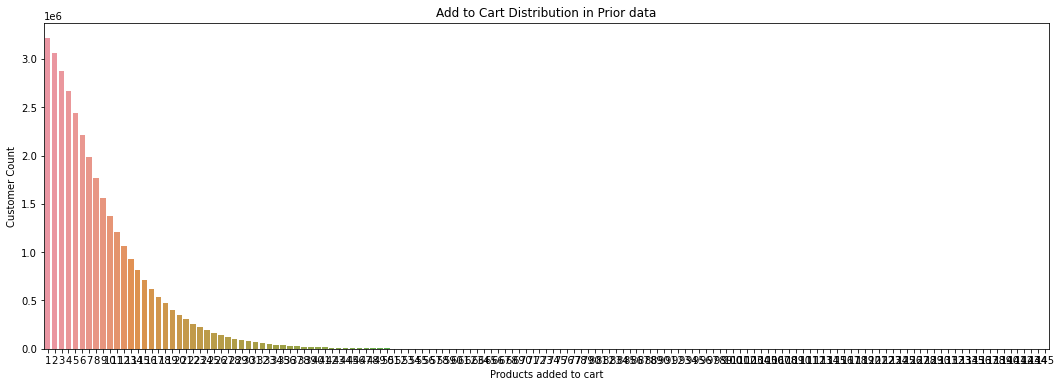

In [44]:
plt.figure(figsize=(18,6))
fig = sns.countplot(x='add_to_cart_order', data=order_products_prior)

plt.xlabel('Products added to cart')
plt.ylabel('Customer Count')
plt.title('Add to Cart Distribution in Prior data')
plt.show()

In [45]:
prior_add_to_cart_count = order_products_prior['add_to_cart_order'].value_counts(ascending=True).reset_index()

In [46]:
prior_add_to_cart_count.columns = ['carts_items','cutomers']
prior_add_to_cart_count.head()

,carts_items,cutomers
0,145,1
1,138,1
2,139,1
3,140,1
4,144,1


<h3 style="color:red">Maximum Product added to cart by any customer is 145</h3>

### 2.1.2. Bar plot: Reordered vs Not Reordered

In [47]:
# How to add percentages on top of bars in seaborn?: https://stackoverflow.com/a/62053049/12991246
def without_hue(plot, feature):
    
    """
    prints percentage on the top of the bar plot
    """
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

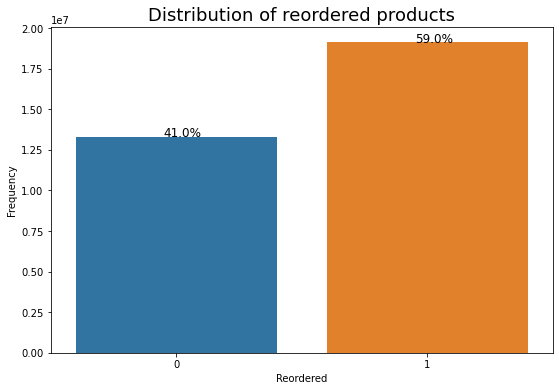

In [48]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x='reordered',data=order_products_prior)
plt.title('Distribution of reordered products',size=18)
plt.xlabel('Reordered')
plt.ylabel('Frequency')
without_hue(ax, order_products_prior.reordered) #function call to add percentage on the top of bar plot
plt.show()

<h3 style="color:red"> Almost 59% of the products had been reordered.</h3> 

## 2.2. Order Product Train

### 2.2.1. Countplot : Add to Cart Order

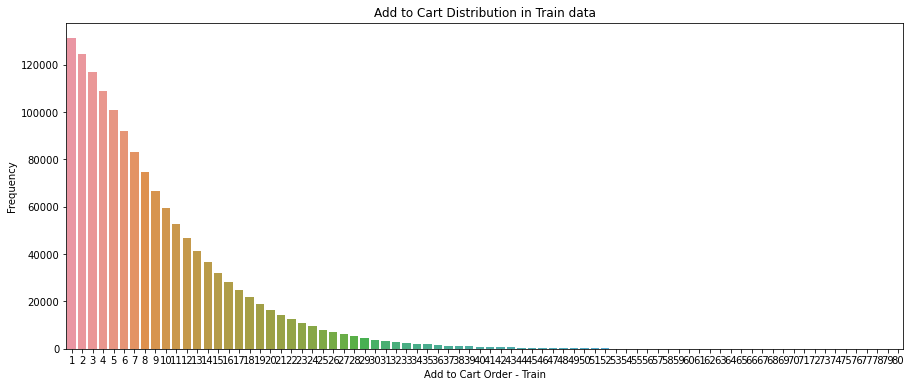

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x='add_to_cart_order', data=order_products_train)
plt.xlabel('Add to Cart Order - Train')
plt.ylabel('Frequency')
plt.title('Add to Cart Distribution in Train data')
plt.show()

In [50]:
train_add_to_cart_count = order_products_train['add_to_cart_order'].value_counts(ascending=True).reset_index()

In [51]:
train_add_to_cart_count.columns = ['carts_items','customers']
train_add_to_cart_count.head()

,carts_items,customers
0,80,2
1,79,2
2,78,2
3,77,3
4,76,5


<h3 style="color:red"> Maximum Product added to cart by any customer is 80.</h3>

### 2.2.2. Bar Plot: Reordered vs Not Reordered

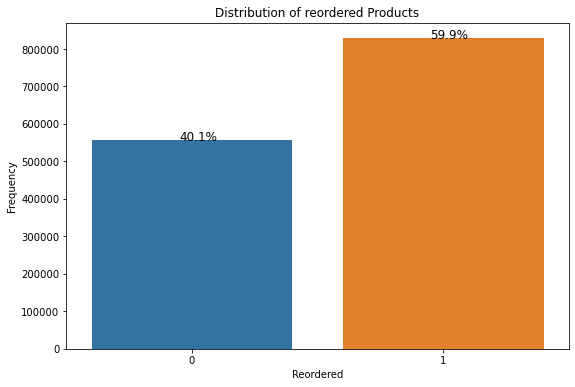

In [52]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x='reordered',data=order_products_train)
plt.title("Distribution of reordered Products")
plt.xlabel("Reordered")
plt.ylabel("Frequency")
without_hue(ax, order_products_train.reordered)
plt.show()

<h3 style="color:red">Almost 60% of the products have been reordered.</h3>

## 2.3. Orders

### 2.3.1. Which day of the week is the most important for ordering?

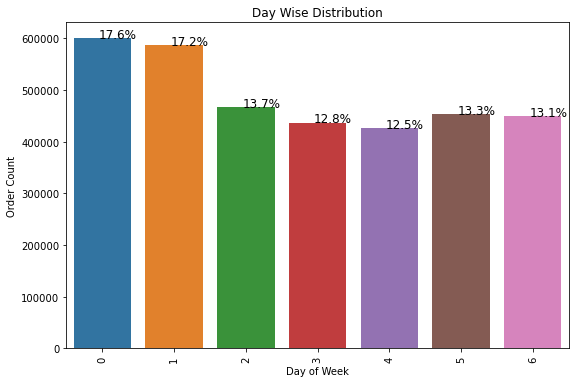

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
ax = sns.countplot(x='order_dow',data=orders)

plt.xticks(rotation='vertical')
plt.title("Day Wise Distribution")
plt.ylabel('Order Count')
plt.xlabel('Day of Week')
without_hue(ax, orders.order_dow)
plt.show()

In [54]:
orders_dow = orders['order_dow'].value_counts(normalize=True).reset_index()
orders_dow.columns = ['Day', 'Order Percentage']
orders_dow['Order Percentage'] = orders_dow['Order Percentage']*100
orders_dow

,Day,Order Percentage
0,0,17.564759
1,1,17.172281
2,2,13.658248
3,5,13.252178
4,6,13.117513
5,3,12.772914
6,4,12.462106


* Most of the orders are done on weekends(assuming 0 as saturday and 1 as sunday)
* Least number of orders has been done on wednesday.

### 2.3.2 Which hour of the day is most important for ordering?

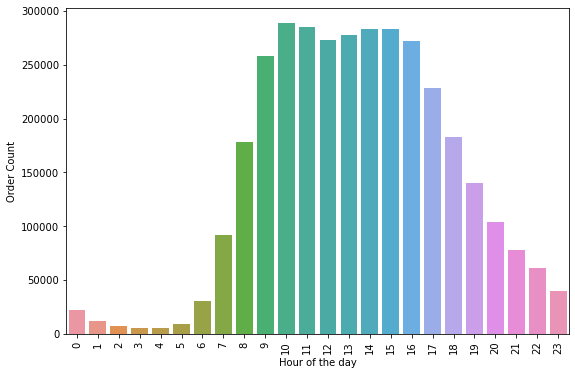

In [55]:
plt.figure(figsize=(9,6))
sns.countplot(x='order_hour_of_day',data=orders)

plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Hour of the day')
plt.show()

In [56]:
order_hour = orders['order_hour_of_day'].value_counts(normalize=True, ascending=False).reset_index()
order_hour.columns = ['Hour','Order Percentage']
order_hour['Order Percentage'] = order_hour['Order Percentage']*100
order_hour

,Hour,Order Percentage
0,10,8.430605
1,11,8.322745
2,15,8.290913
3,14,8.273462
4,13,8.126052
5,12,7.975282
6,16,7.966863
7,9,7.535976
8,17,6.687794
9,18,5.346611


* Most of the orders is done between 8 am to 6 pm

### 2.3.3. How after many days customer usually reorder products ?

In [57]:
#dropping the rows having NAN values
orders['days_since_prior_order'] = orders['days_since_prior_order'].dropna()

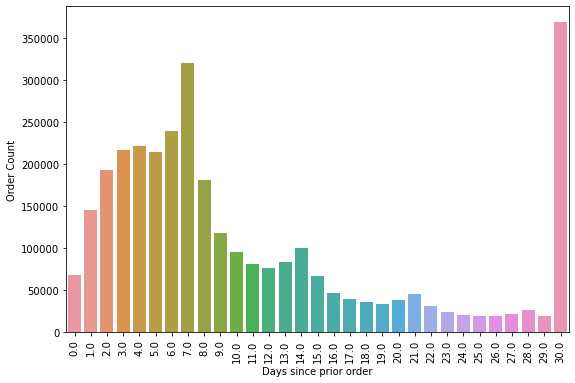

In [58]:
plt.figure(figsize=(9,6))
sns.countplot(x='days_since_prior_order',data=orders)

plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Days since prior order')
plt.show()

In [59]:
order_days_prior = orders['days_since_prior_order'].value_counts(normalize=True).reset_index()
order_days_prior.columns = ['day','Order Percentage']
order_days_prior['Order Percentage'] = order_days_prior['Order Percentage']*100
order_days_prior

,day,Order Percentage
0,30.0,11.487946
1,7.0,9.972646
2,6.0,7.465705
3,4.0,6.895947
4,3.0,6.750031
5,5.0,6.672206
6,2.0,6.009753
7,8.0,5.652383
8,1.0,4.517969
9,9.0,3.676287


* Maximum orders has been observed after 30 days
* Second most number of orders has been done after 7 days

### 2.3.4. How many products do customers usually order ?

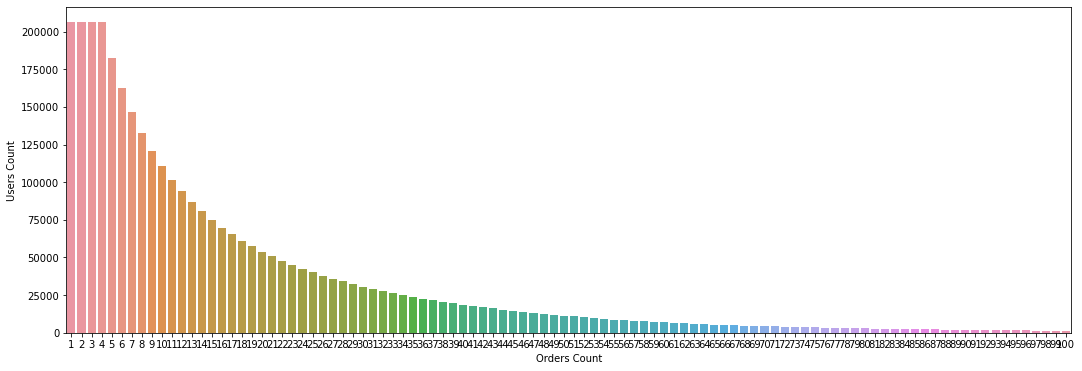

In [60]:
plt.figure(figsize=(18,6))
order_number = orders['order_number'].value_counts().reset_index()
order_number.columns = ['order_count','customers']

sns.barplot(order_number['order_count'], order_number['customers'])
plt.xlabel('Orders Count')
plt.ylabel('Users Count')
plt.show()

In [61]:
order_number.head()

,order_count,customers
0,1,206209
1,2,206209
2,3,206209
3,4,206209
4,5,182223


In [62]:
order_number.tail()

,order_count,customers
95,96,1592
96,97,1525
97,98,1471
98,99,1421
99,100,1374


* Minimum number of items ordered by any customer is 4.
* Maximum number of items ordered by any customer is 100, and it is done by 1374 customers.

### 2.3.5. Data distribution across different sets

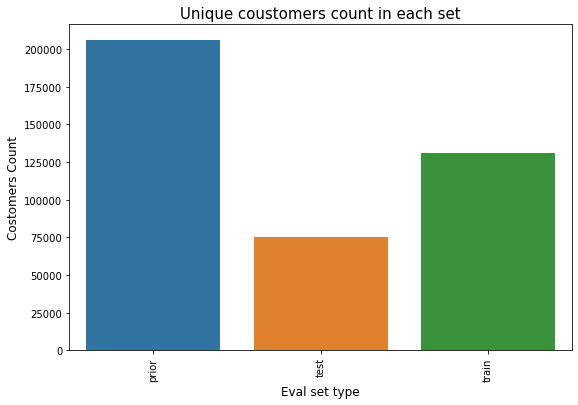

In [63]:
#get count of unique values in column pandas - https://stackoverflow.com/a/38309823/12991246
plt.figure(figsize=(9,6))
set_count = orders.groupby('eval_set')['user_id'].nunique().reset_index()
set_count.columns = ['eval_set','unique_customers']

ax = sns.barplot(set_count['eval_set'], set_count['unique_customers'])
plt.ylabel('Costomers Count', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Unique coustomers count in each set', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
set_count

,eval_set,unique_customers
0,prior,206209
1,test,75000
2,train,131209


* All customers data are there in the prior set
* Out of 206209 coustomers, 131209 coustomers data has been given in the train set.
* For 75000 coustomers,We need to predict the products.

## 2.4. Product Orders Prior

<b> Merging the tables (order_product_prior, products, aisles, departments)</b>

In [65]:
#https://www.geeksforgeeks.org/python-merge-join-and-concatenate-dataframes-using-panda/

merged_with_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
merged_with_prior = pd.merge(merged_with_prior, aisles, on='aisle_id', how='left')
merged_with_prior = pd.merge(merged_with_prior, departments, on='department_id', how='left')
merged_with_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [66]:
merged_with_prior.shape

(32434489, 9)

### 2.4.1. Top 10 Products

In [67]:
top_10_products = merged_with_prior['product_name'].value_counts(normalize=True).head(10).reset_index()
top_10_products.columns = ['products','percentage']
top_10_products['percentage'] = top_10_products['percentage']*100
top_10_products

,products,percentage
0,Banana,1.456983
1,Bag of Organic Bananas,1.169897
2,Organic Strawberries,0.816054
3,Organic Baby Spinach,0.745876
4,Organic Hass Avocado,0.658509
5,Organic Avocado,0.545145
6,Large Lemon,0.470663
7,Strawberries,0.440738
8,Limes,0.433572
9,Organic Whole Milk,0.425180


### Bar plot: Top 10 Products

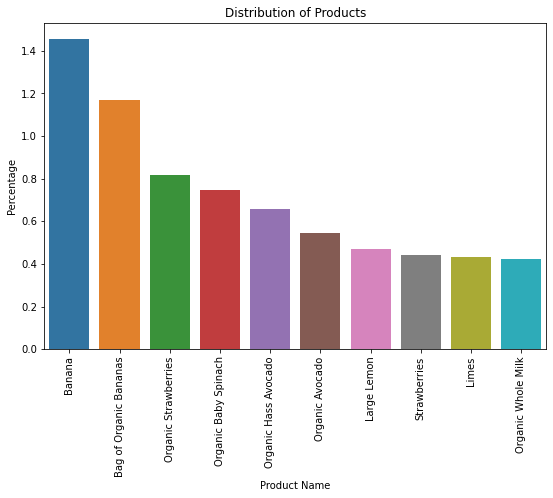

In [68]:
plt.figure(figsize=(9,6))
sns.barplot(top_10_products['products'],top_10_products['percentage'])

plt.xticks(rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('Percentage')
plt.title("Distribution of Products")
plt.show()

* Banana is the most ordered product by the coustomers.
* Most of the frequently ordered products are organic products.

### 2.4.2. Top 10 Aisles

In [69]:
top_10_aisles = merged_with_prior['aisle'].value_counts(normalize=True).head(10).reset_index()
top_10_aisles.columns = ["aisles","percentage"]
top_10_aisles['percentage'] = top_10_aisles['percentage']*100
top_10_aisles

,aisles,percentage
0,fresh fruits,11.229368
1,fresh vegetables,10.538230
2,packaged vegetables fruits,5.442703
3,yogurt,4.477774
4,packaged cheese,3.020744
5,milk,2.747122
6,water seltzer sparkling water,2.594562
7,chips pretzels,2.227475
8,soy lactosefree,1.967822
9,bread,1.803124


### Bar Plot: Top 10 Aisles

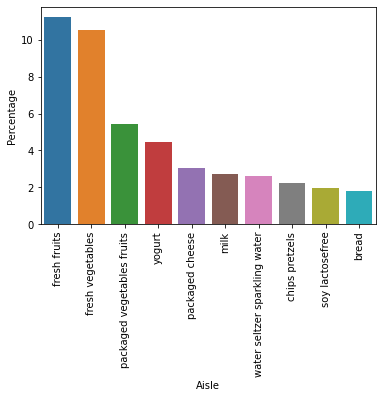

In [70]:
sns.barplot(top_10_aisles['aisles'], top_10_aisles['percentage'])
plt.ylabel('Percentage')
plt.xlabel('Aisle')
plt.xticks(rotation='vertical')
plt.show()

* Fresh Fruits and Fresh Vegetables are the top 2 aisles

### 2.4.3. Top 10 Departments

In [71]:
dept_count = merged_with_prior['department'].value_counts(normalize=True).head(10).reset_index()
dept_count.columns = ['Department_Name', 'percentage']
dept_count['percentage'] = dept_count['percentage']*100
dept_count

,Department_Name,percentage
0,produce,29.225961
1,dairy eggs,16.692158
2,snacks,8.902715
3,beverages,8.294038
4,frozen,6.895228
5,pantry,5.782662
6,bakery,3.628197
7,canned goods,3.292970
8,deli,3.241146
9,dry goods pasta,2.671930


### Bar Plot: Top 10 Departments

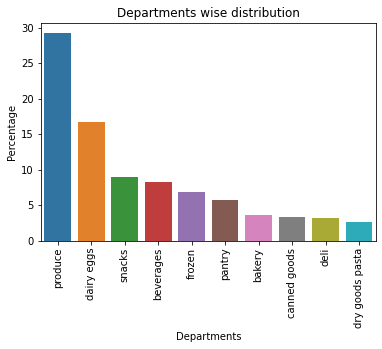

In [72]:
sns.barplot(dept_count['Department_Name'],dept_count['percentage'])
plt.xlabel('Departments')
plt.ylabel('Percentage')
plt.title("Departments wise distribution", fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

* Produce is the largest department

### 2.4.4. Bar Plot: Department wise reorder

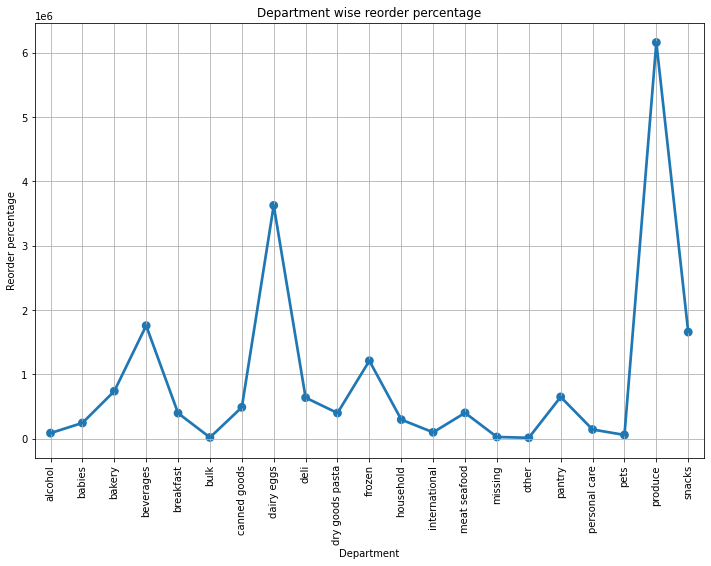

In [73]:
reordered_department = merged_with_prior.groupby(["department"])["reordered"].sum().reset_index()

plt.figure(figsize=(12,8))

#https://seaborn.pydata.org/generated/seaborn.pointplot.html
sns.pointplot(reordered_department['department'].values, reordered_department['reordered'].values)
plt.ylabel('Reorder percentage')
plt.xlabel('Department')
plt.title("Department wise reorder percentage")
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [74]:
#https://stackoverflow.com/a/40048205/12991246

desc_sorted = reordered_department.sort_values('reordered', ascending=False)
desc_sorted['percentage'] = (desc_sorted['reordered']/desc_sorted['reordered'].sum())*100
desc_sorted.columns = ['department','count','percentage']
desc_sorted

,department,count,percentage
19,produce,6160710,32.210276
7,dairy eggs,3627221,18.964338
3,beverages,1757892,9.190854
20,snacks,1657973,8.668444
10,frozen,1211890,6.336171
2,bakery,739188,3.864725
16,pantry,650301,3.399994
8,deli,638864,3.340197
6,canned goods,488535,2.554226
13,meat seafood,402442,2.104103


<h3 style='color:red'> Produce and dairy eggs are two largest departments </h3>

## 2.5. Product Orders Train

<b> Merging the tables(order_products_train, orders) </b>

In [75]:
merged_with_train = pd.merge(order_products_train, orders, on='order_id', how='left')
merged_with_train

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,169679,train,30,0,10,4.0
1384613,3421063,35548,4,1,169679,train,30,0,10,4.0
1384614,3421070,35951,1,1,139822,train,15,6,10,8.0
1384615,3421070,16953,2,1,139822,train,15,6,10,8.0


### 2.5.1. How cart products are reordered ?

In [76]:
cart_reordered = merged_with_train.groupby(['add_to_cart_order'])['reordered'].sum().reset_index()

### Point Plot: Add to cart Order

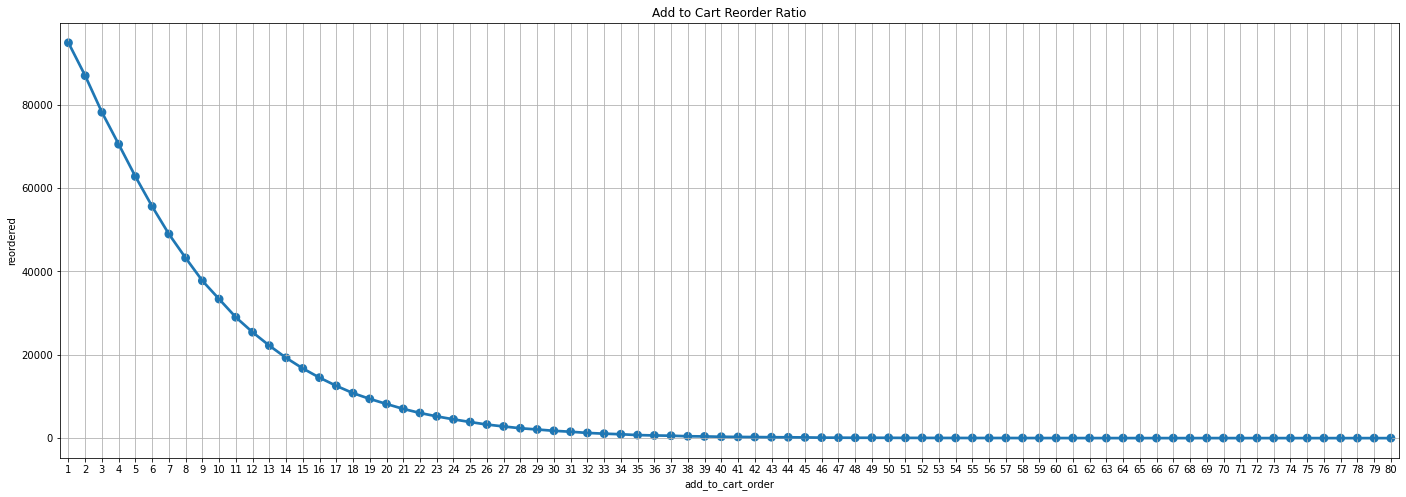

In [77]:
plt.figure(figsize=(24,8))
sns.pointplot(cart_reordered['add_to_cart_order'],cart_reordered['reordered'])
plt.title('Add to Cart Reorder Ratio')
plt.grid()
plt.show()

In [78]:
cart_reordered.sort_values('reordered',ascending=False)

,add_to_cart_order,reordered
0,1,94817
1,2,86916
2,3,78150
3,4,70492
4,5,62744
...,...,...
74,75,2
76,77,2
77,78,1
78,79,1


<h3 style='color:red'> Observation: Products which are added to the cart earlier are very likely to be reordered than the products which are added later. </h3>

### 2.5.2. How products are ordered on the basic of day of the week ?

In [79]:
dow_reordered = merged_with_train.groupby(['order_dow'])['reordered'].sum().reset_index()

### Bar Plot: Product Reorder across day of the week

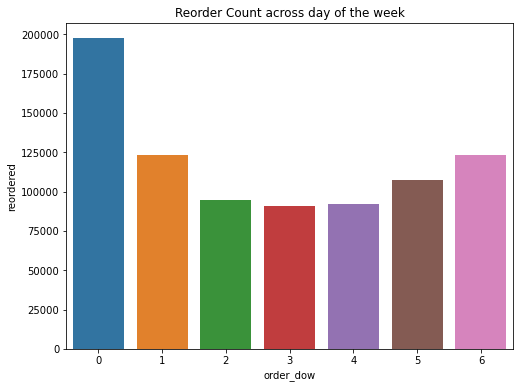

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(dow_reordered['order_dow'],dow_reordered['reordered'])
plt.title("Reorder Count across day of the week")
plt.show()

In [81]:
dow_reordered.sort_values('reordered',ascending=False)

,order_dow,reordered
0,0,197534
1,1,123376
6,6,123173
5,5,107239
2,2,94469
4,4,92454
3,3,90579


<h3 style="color:red">Observation: Most of the products are likely to be reordered on saturday </h3>

### 2.5.3. How products are reordered according to hour of the day ?

In [82]:
hod_reordered = merged_with_train.groupby(['order_hour_of_day'])['reordered'].sum().reset_index()

### Bar plot: Product Reorder across hour of the day

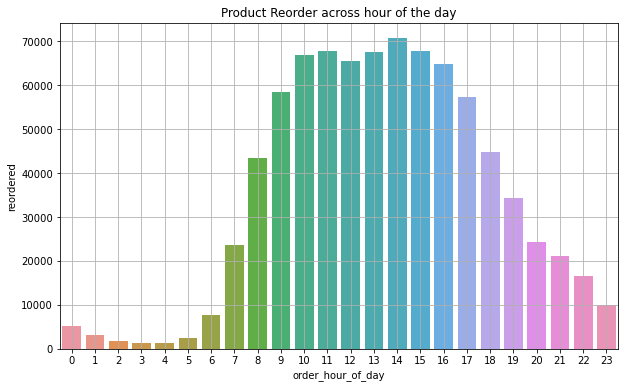

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(hod_reordered['order_hour_of_day'],hod_reordered['reordered'])
plt.title("Product Reorder across hour of the day")
plt.grid()
plt.show()

In [84]:
hod_reordered

,order_hour_of_day,reordered
0,0,5188
1,1,3260
2,2,1870
3,3,1418
4,4,1454
5,5,2396
6,6,7708
7,7,23578
8,8,43353
9,9,58497


<h3 style="color:red">Observation: Most of the products are reordered between 9 am and 5 pm, Maximum products has been reordered at 2 pm </h3>

### 2.5.4. How Products are reordered based on past purchase time ?

In [85]:
day_prior_reordered = merged_with_train.groupby(['days_since_prior_order'])['reordered'].sum().reset_index()

### Bar Plot: Product reorder based on time of previous order

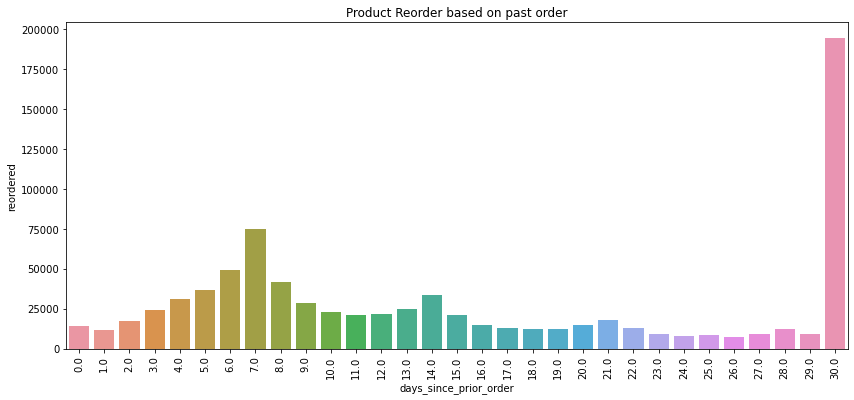

In [86]:
plt.figure(figsize=(14,6))
sns.barplot(day_prior_reordered['days_since_prior_order'],day_prior_reordered['reordered'])
plt.xticks(rotation="vertical")
plt.title("Product Reorder based on past order")
plt.show()

In [87]:
day_prior_reordered

,days_since_prior_order,reordered
0,0.0,14048
1,1.0,11853
2,2.0,17044
3,3.0,23874
4,4.0,30889
5,5.0,36386
6,6.0,48911
7,7.0,75015
8,8.0,41923
9,9.0,28549


<h3 style="color:red">Observation: Products are most likely to be reordered after 30 days.</h3>

## 2.6. Summary

### 2.6.1. Order Product Prior

In [88]:
prior = Texttable()

prior.add_rows([['column_name','Information'],
               ['add_to_cart_order','145 is the max items add to cart'],
               ['reordered','reordered percentage is 59']])

print(prior.draw())

+-------------------+----------------------------------+
|    column_name    |           Information            |
+===================+==================================+
| add_to_cart_order | 145 is the max items add to cart |
+-------------------+----------------------------------+
| reordered         | reordered percentage is 59       |
+-------------------+----------------------------------+


### 2.6.2. Order Product Train

In [89]:
train = Texttable()

train.add_rows([['column_name','Information'],
               ['add_to_cart_order','80 is max items added to cart while 2 is min'],
               ['reordered','reordered percentage is 60']])

print(train.draw())

+-------------------+----------------------------------------------+
|    column_name    |                 Information                  |
+===================+==============================================+
| add_to_cart_order | 80 is max items added to cart while 2 is min |
+-------------------+----------------------------------------------+
| reordered         | reordered percentage is 60                   |
+-------------------+----------------------------------------------+


### 2.6.3. Orders

In [90]:
orders_tt = Texttable()

orders_tt.add_rows([['column_name','Information'],
                   ['eval_set','prior - 206209\ntrain - 131209\ntest - 75000'],
                   ['order_number','Max orders - 100\nMin orders - 4'],
                   ['order_dow','Saturday and Sunday are most Important'],
                   ['order_hour_of_day','8 am to 6 pm are the peak hours'],
                   ['days_since_prior_order','people usually orders after 30 days or 7 days']])

print(orders_tt.draw())

+------------------------+-----------------------------------------------+
|      column_name       |                  Information                  |
+========================+===============================================+
| eval_set               | prior - 206209                                |
|                        | train - 131209                                |
|                        | test - 75000                                  |
+------------------------+-----------------------------------------------+
| order_number           | Max orders - 100                              |
|                        | Min orders - 4                                |
+------------------------+-----------------------------------------------+
| order_dow              | Saturday and Sunday are most Important        |
+------------------------+-----------------------------------------------+
| order_hour_of_day      | 8 am to 6 pm are the peak hours               |
+------------------------

### 2.6.4. Products Order Prior

In [91]:
product_order_tt = Texttable()

product_order_tt.add_rows([['column_name','Information'],
                          ['product','Banana is most reordered product'],
                          ['aisle','Fresh Fruits is the most reordered aisle'],
                          ['Department','Produce is the most important department']])

print(product_order_tt.draw())

+-------------+------------------------------------------+
| column_name |               Information                |
+=============+==========================================+
| product     | Banana is most reordered product         |
+-------------+------------------------------------------+
| aisle       | Fresh Fruits is the most reordered aisle |
+-------------+------------------------------------------+
| Department  | Produce is the most important department |
+-------------+------------------------------------------+


# 3. Bi-Variate Analysis

In [100]:
merged_with_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


### 3.1. Order Day of week vs Order Hour of day

In [129]:
dow_hour = pd.crosstab(index=merged_with_train['order_dow'],
            columns=merged_with_train['order_hour_of_day'],
            values=merged_with_train['reordered'],
            aggfunc=sum)

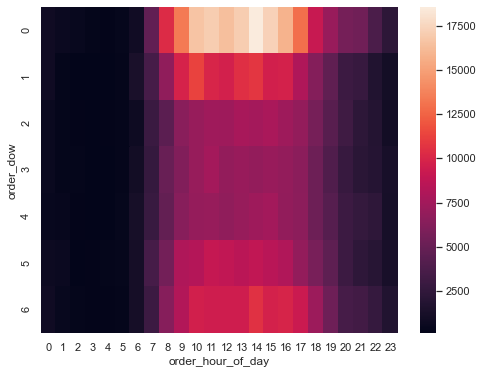

In [131]:
plt.figure(figsize=(8,6))
sns.heatmap(dow_hour)
plt.show()

<h3 style='color:red'>Observation: Most of the orders has been recorded when the day is saturday between 10 am to 4 pm </h3>

### 3.2. Order Day of week vs Days Since Prior Order

In [132]:
dow_prior = pd.crosstab(index=merged_with_train['order_dow'],
            columns=merged_with_train['days_since_prior_order'],
            values=merged_with_train['reordered'],
            aggfunc=sum)

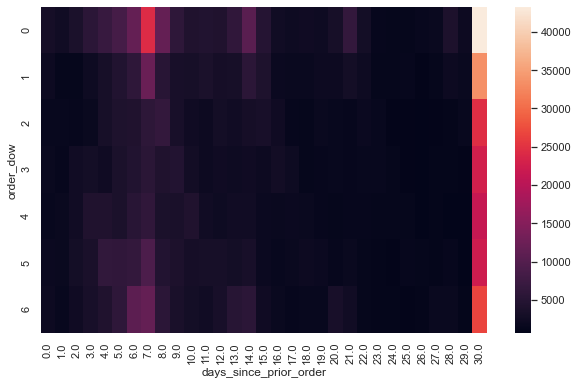

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(dow_prior)
plt.show()

<h3 style='color:red'>Observation: If the day is saturday and day since prior order is 30, Most of the orders has been recorded </h3>

### 3.3. Order Hour of Day vs Days since prior order

In [138]:
hour_prior = pd.crosstab(index=merged_with_train['order_hour_of_day'],
            columns=merged_with_train['days_since_prior_order'],
            values=merged_with_train['reordered'],
            aggfunc=sum)

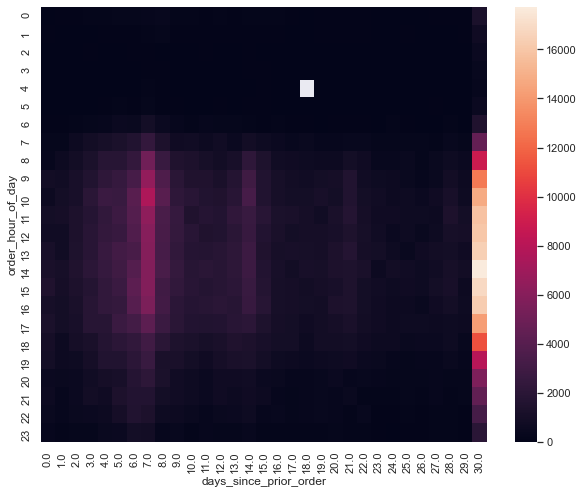

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(hour_prior,annot=False)
plt.show()

<h3 style='color:red'>Observation: Most of the orders can be observed after 30 days and between 10 am to 4 pm </h3>

## 4. Correlation

### 4.1. Product Orders Train

In [92]:
new_df_1 = merged_with_prior.drop(['reordered'],axis=1)

In [163]:
# How to print correlatio matrix: https://stackoverflow.com/a/50703596/12991246

prior_corr = new_df_1.corr()
prior_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,order_id,product_id,add_to_cart_order,aisle_id,department_id
order_id,1.00,-0.00,-0.00,-0.00,-0.00
product_id,-0.00,1.00,0.01,0.00,-0.03
add_to_cart_order,-0.00,0.01,1.00,0.01,0.03
aisle_id,-0.00,0.00,0.01,1.00,0.06
department_id,-0.00,-0.03,0.03,0.06,1.00


### 4.2. Product Orders Prior

In [95]:
new_df_2 = merged_with_train.drop(['reordered'],axis=1)

In [161]:
train_cor = new_df_2.corr()
train_cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
product_id,-0.00,1.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
add_to_cart_order,0.00,0.00,1.00,0.00,0.01,-0.02,-0.01,0.02
user_id,-0.00,-0.00,0.00,1.00,-0.00,-0.01,-0.00,0.00
order_number,0.00,-0.00,0.01,-0.00,1.00,0.02,-0.03,-0.40
order_dow,0.00,-0.00,-0.02,-0.01,0.02,1.00,0.01,-0.03
order_hour_of_day,-0.00,0.00,-0.01,-0.00,-0.03,0.01,1.00,0.01
days_since_prior_order,0.00,0.00,0.02,0.00,-0.40,-0.03,0.01,1.00
